

# Project: TMDb movie data
done by :Abeer Almashajari

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I will analysis TMDb movie dataset . This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [13]:
# import statements for all of the packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [14]:
# Load data and print out a few lines. 

mov = pd.read_csv('tmdb-movies.csv')
mov.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [15]:
mov.shape

(10866, 21)

<a id='wrangling'></a>
## Data Wrangling

Here I will check the data for cleaning them and prepare them for the next stage.from the dataset I notice missing value ,zero values ,pipe character ,and unknown currency .

cleaning dataset  :
<ul>
<li>  Delete an unnecessary column . </li>
<li> Delete duplicate values </li>
<li> Delete missing data because , its objects can be fill in . </li>
    <li> Delete all zero values</li>
    <li> Remove pipe (|) character from genres </li>
</ul>


In [16]:
#take look at data type 
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [17]:
mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning 

In [18]:
#drop unnecessary columns
mov.drop(['id','homepage','tagline','overview','production_companies','release_date','vote_count','keywords','imdb_id','budget_adj','revenue_adj','cast'] , axis=1 , inplace=True)
mov.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,7.3,2015


In [19]:

#take look at missing data
mov.isnull().sum()


popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
vote_average       0
release_year       0
dtype: int64

In [20]:
#drop all missing data 
mov.dropna(how='any',inplace=True)
mov.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_average      0
release_year      0
dtype: int64

In [21]:
#check duplicate value
mov.duplicated().sum()

1

In [22]:
#drop duplicate value
mov.drop_duplicates(inplace=True)
mov.duplicated().sum()

0

In [23]:
#delete all zero values
mov = mov[(mov != 0).all(1)]


In [24]:
#remove pipe (|) character from genres 
mov['genres'] = mov.genres.str.split("|",expand=True)
mov.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,7.3,2015


In [106]:
#after cleaning shape
mov.shape

(3853, 10)

## <a id='eda'></a>
## Exploratory Data Analysis

In the investigation question , for the big qustion , I will investigate the profit and which are the associated properties that makes the biggest profit in film industry ?and what are the most popular profitable genre 
<br> I will get the answer for this from the question list:
<ol>
<li>  Does a bigger film production budget result in more ticket sales? what is the relation between profit and budget ? 
    </li>
           <ul>
            <li>What is the highest and lowset budget movie?</li>
            <li>What is the highest and lowset profit movie?</li>
                <li>What is the highest and lowset revenue movie?</li>
            </ul>
      <li>  Which genres are most popular from year to year? </li>
         <li>  Which genres are the most highest  revenue?   </li>
     <li>What is the average run time of a moive genre  </li>
  
 <li> What are the most top 5 popular movie ? </li>
</ol>

## Research Question 1- Does a bigger film production budget result in more ticket sales? what is the relation between profit and budget ?
1.1 - To answer this question , I will calculate the max and min for profit and the budget to see if there is a relation

In [25]:
#get the max budget movie
mov[ mov['budget'] == mov['budget'].max()]

,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year
2244,0.25054,425000000,11087569,The Warrior's Way,Sngmoo Lee,100,Adventure,6.4,2010


In [26]:
#get the min budget movie
mov[ mov['budget'] == mov['budget'].min()]

,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year
2618,0.090186,1,100,Lost & Found,Jeff Pollack,95,Comedy,4.8,1999
3581,0.520430,1,1378,"Love, Wedding, Marriage",Dermot Mulroney,90,Comedy,5.3,2011


##### -The highest budget movie is : The Warrior's Way by 42M
##### -The lowset budget is : Lost & Found and Love, Wedding, Marriage 1M


##### 2.1- What is the highest and lowset profit movie?

In [27]:
#calculate profit in new column with the name profit 
mov['profit'] = mov['revenue'] - mov['budget']


In [28]:
#get the max profit movie
max_pro = mov[ mov['profit'] == mov['profit'].max()]
max_pro

,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year,profit
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action,7.1,2009,2544505847


In [29]:
#get the min profit movie
mov[ mov['profit'] == mov['profit'].min()]

,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year,profit
2244,0.25054,425000000,11087569,The Warrior's Way,Sngmoo Lee,100,Adventure,6.4,2010,-413912431


#### - The highest profit movie is Avatar by over 2.7 billion

#### -The lowset profit is The Warrior's Way by -41M



In [50]:
#using group by to get the mean profit for each budget 
mean_profit = mov.groupby('budget').profit.mean()
mean_profit.max()

2544505847.0

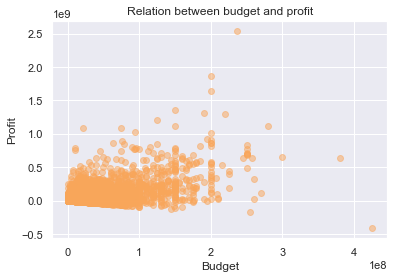

In [49]:
sns.set()
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Relation between budget and profit')
plt.scatter(mov['budget'],mov['profit'], alpha=0.5, color= '#f9a65a')
plt.show()

In [32]:
#get the max movie revenue 
mov.loc[mov['revenue'].idxmax()]

popularity              9.43277
budget                237000000
revenue              2781505847
original_title           Avatar
director          James Cameron
runtime                     162
genres                   Action
vote_average                7.1
release_year               2009
profit               2544505847
Name: 1386, dtype: object

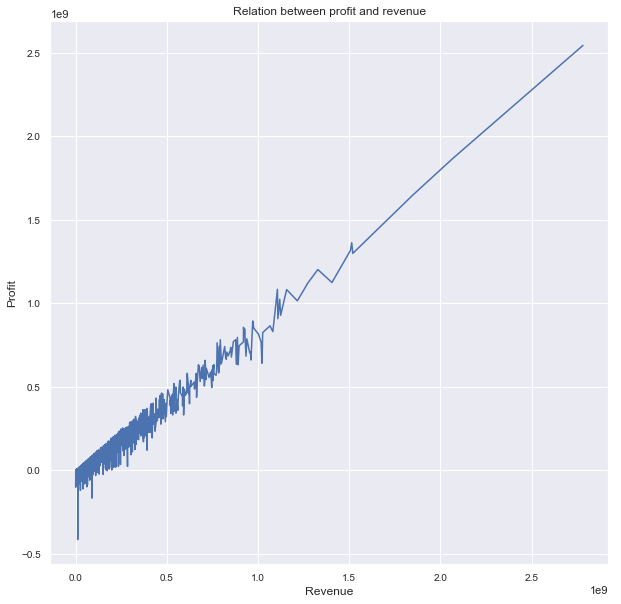

In [93]:
#plot showing relation between profit and revenue
sns.set()
max_profit =mov.groupby('revenue').profit.max()
line_chart = max_profit.plot.line(fontsize = 10,figsize= (10,10))
line_chart.set(title = 'Relation between profit and revenue' ,xlabel='Revenue' ,ylabel='Profit');

##### Research answer 1- The diagram above" Relation between budget and profit" shows that there is no relation or big difference between spending money on production and gaining profit, most of the budget less than 25Mdollar .but there is a relation between profit and revenue , the chart shows when higher revenue profit gets higher too .
<br>
(*I used the same qustion from this link  http://www.randalolson.com/2014/12/29/does-a-bigger-film-production-budget-result-in-more-ticket-sales/)

# Research Question 2- Which genres are most popular from year to year?

In [127]:
#count number of movie over year release by grouping genres
number_mov= mov.groupby('genres').release_year.count()
number_mov


genres
Action             689
Adventure          314
Animation          103
Comedy             787
Crime              171
Documentary         32
Drama              889
Family              40
Fantasy            110
History             17
Horror             275
Music               29
Mystery             36
Romance             66
Science Fiction     98
TV Movie             1
Thriller           160
War                 20
Western             16
Name: release_year, dtype: int64

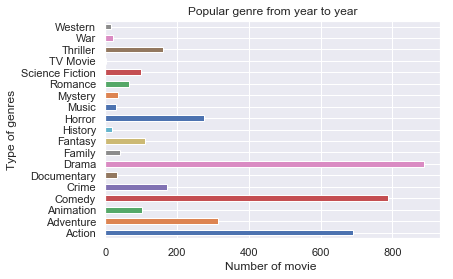

In [128]:
chart = number_mov.plot.barh()
chart.set(title = 'Popular genre from year to year')
chart.set_ylabel('Type of genres')
chart.set_xlabel('Number of movie ');


##### Research answer 2-The digram shows that drama gener are the most popular based to number of movie under this type by 2453 movie .

# Research Question 3- Which genres are the most highest revenue? 

In [129]:
#change the index to movie title , to show the movie with the higher revenue
genr = mov.set_index(['genres']).select_dtypes('number')
genr.head()

,popularity,budget,revenue,runtime,vote_average,release_year,profit
genres,,,,,,,
Action,32.985763,150000000,1513528810,124,6.5,2015,1363528810
Action,28.419936,150000000,378436354,120,7.1,2015,228436354
Adventure,13.112507,110000000,295238201,119,6.3,2015,185238201
Action,11.173104,200000000,2068178225,136,7.5,2015,1868178225
Action,9.335014,190000000,1506249360,137,7.3,2015,1316249360


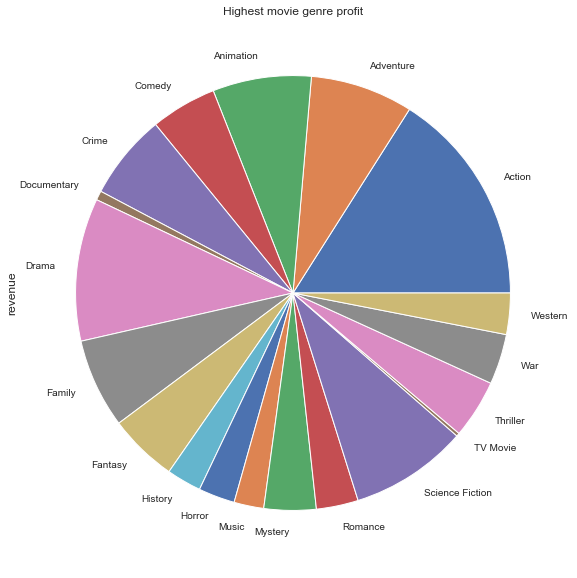

In [65]:
#plot shows most popular genre

genr = mov.groupby('genres').revenue.max()
chart = genr.plot.pie(fontsize = 10,figsize=(20, 10))
chart.set(title = 'Highest movie genre profit');


Research answer 3- Action genre movie is the highest revenue of the all genres by 1Billion .

# Research Question 4-  What is the average run time of a moive genre ? 

In [95]:
avg_runtime = mov.groupby('genres').runtime.mean()
avg_runtime

genres
Action             110.484761
Adventure          114.802548
Animation           90.233010
Comedy             102.142313
Crime              114.853801
Documentary        101.968750
Drama              117.611924
Family              93.475000
Fantasy            104.518182
History            129.294118
Horror              97.770909
Music              107.965517
Mystery            106.611111
Romance            107.636364
Science Fiction    110.520408
TV Movie            89.000000
Thriller           110.268750
War                128.100000
Western            121.937500
Name: runtime, dtype: float64

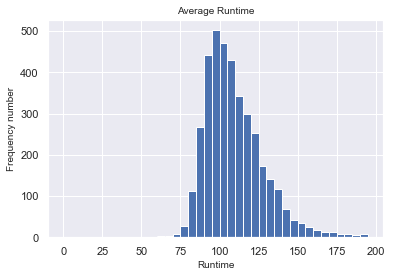

In [103]:
#histgram shows the averag runtime 
bin_value = np.arange(0,200,5)
plt.hist(mov['runtime'],bins = bin_value);
plt.xlabel('Runtime',fontsize = 10);
plt.ylabel('Frequency number',fontsize = 10);
plt.title('Average Runtime', fontsize = 10);

The diagram shows the average runtime between 90-150 minutes for most movies .

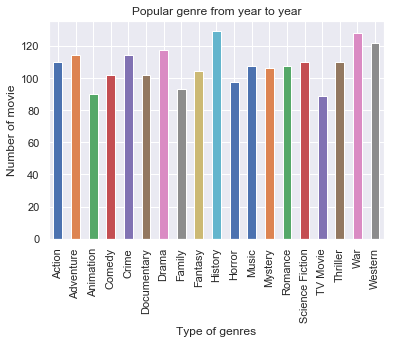

In [96]:
chart = avg_runtime.plot.bar()
chart.set(title = 'Popular genre from year to year')
chart.set_ylabel('Number of movie')
chart.set_xlabel('Type of genres');

Research answer 4- Average runtime is 133.25 minit for the history genre

# Research Question 5-What are the most top 5 popular movie ?

In [104]:
#use the agg method specifying the columns to aggregate and the functions to apply.
movie_info = mov.groupby('original_title').agg({'popularity': [np.max, np.mean]})
movie_info.head()

popularity          
                                 amax      mean
original_title                                 
(500) Days of Summer         3.244139  3.244139
10 Things I Hate About You   1.769152  1.769152
10,000 BC                    1.841839  1.841839
101 Dalmatians               1.419885  1.419885
102 Dalmatians               0.410235  0.410235

In [105]:
#sort the movie_stats so that we can see which movies have the highest popularity.
sorted_mov =movie_info.sort_values([('popularity', 'mean')], ascending=False)
sorted_mov.head()

popularity           
                              amax       mean
original_title                               
Jurassic World           32.985763  32.985763
Mad Max: Fury Road       28.419936  28.419936
Interstellar             24.949134  24.949134
Guardians of the Galaxy  14.311205  14.311205
Insurgent                13.112507  13.112507

Research answer 5--The 5 most poublar movies are based to the popularity most of these movies are under the action genre :<br> 
1-Jurassic World
  2-Mad Max: Fury Road 	
   3-Interstellar 
    4-Guardians of the Galaxy
    5-Insurgent

### <a id='conclusions'></a>
## Conclusions

1-The highest budget movie is : The Warrior's Way by 42M and the lowset budget is : Lost & Found and Love, Wedding, Marriage 1M.<br>
2-The highest profit movie is Avatar by over 2.7 billion and the lowset profit is The Warrior's Way by -41M.<br>

There is no relation or big difference between spending money on production and gaining profit, most of the budget less than 25M dollar ,so it's true "the more that’s spent on film production, the less likely the film will end up making that investment back in ticket sales".but there is a relation between profit and revenue , the chart shows when higher revenue profit gets higher too by 2 billion .<br>

3- The drama genre are the most popular based to number of movie under this type by 2453 movie. otherwise, the action genre are most highest revenue by 1 million .<br>
4-The average runtime is 133.25 minit for the history genre ,which not that much popular.<br>
5-The 5 most poublar movies are based to the popularity most of these movies are under the action genre :<br> 
<br>

<li>1-Jurassic World </li> 
<li>    2-Mad Max: Fury Road </li> 	
 <li>    3-Interstellar 	</li> 
 <li>   4-Guardians of the Galaxy</li> 
   <li> 5-Insurgent</li> 

 <b> Finally,from the result it shows that the most popular and profitable movies are under the Action genre  </b>
 
  Limitations:<br>
  
<li>The data set provided is not clear if the information is from the worldwide or based to American population.</li>
<li>The budget and revenue column do not have currency unit, and I assumed that its in US dollar.</li>
<li>Dropping the rows with missing values or zeroes also affected the overall analysis.</li>

#### Additional Resources:

<li> pandas documentation</li>
<li>Data School yotube chanel </li>
<li>Randal S. Olson blog</li>
<li>Plotly</li>